In [2]:
import os
from pathlib import Path
from skimage import feature, io
from skimage.transform import resize
import numpy as np
import joblib
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.preprocessing import LabelEncoder

In [3]:
# Directories
data_dir = Path('/Users/ounissifadoua/Downloads/garbage-classification/Garbage/original_images')
PATH_TEST = r"/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images"
PATH_TRAIN = r"/Users/ounissifadoua/Downloads/garbage-classification/Garbage/original_images"
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [4]:
# Function to extract features
def extract_features(image_path):
    image = io.imread(image_path, as_gray=True)
    resized_img = resize(image, (32, 32))
    hog_features = feature.hog(resized_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    return hog_features

In [5]:
# load dataset,train and test data
def load_dataset(directory):
    features = []
    labels = []
    for class_label in class_names:
        class_dir = os.path.join(directory, class_label)
        if os.path.isdir(class_dir):
            for file_name in os.listdir(class_dir):
                file_path = os.path.join(class_dir, file_name)
                if os.path.isfile(file_path):
                    image_features = extract_features(file_path)
                    features.append(image_features)
                    labels.append(class_label)
    return np.array(features), np.array(labels)
train_features, train_labels = load_dataset(PATH_TRAIN)
test_features, test_labels = load_dataset(PATH_TEST)


In [7]:
# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)


In [8]:
# Train the model
model = XGBClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(train_features, train_labels_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [9]:
# Evaluate the model
train_predictions = model.predict(train_features)
test_predictions = model.predict(test_features)

train_loss = log_loss(train_labels_encoded, model.predict_proba(train_features))
test_loss = log_loss(test_labels_encoded, model.predict_proba(test_features))

print(f"Training Accuracy: {accuracy_score(train_labels_encoded, train_predictions)}")
print(f"Testing Accuracy: {accuracy_score(test_labels_encoded, test_predictions)}")
print(f"Training Loss: {train_loss}")
print(f"Testing Loss: {test_loss}")
print("Classification Report:\n", classification_report(test_labels_encoded, test_predictions, target_names=label_encoder.classes_))


Training Accuracy: 0.998812821527503
Testing Accuracy: 0.7562326869806094
Training Loss: 0.012834876332619394
Testing Loss: 0.6532085596275051
Classification Report:
               precision    recall  f1-score   support

   cardboard       0.86      0.81      0.83       403
       glass       0.77      0.76      0.76       501
       metal       0.88      0.49      0.63       410
       paper       0.74      0.90      0.81       594
     plastic       0.64      0.82      0.72       482
       trash       0.95      0.53      0.68       137

    accuracy                           0.76      2527
   macro avg       0.81      0.72      0.74      2527
weighted avg       0.78      0.76      0.75      2527



In [10]:
# Specify the model path for saving
model_dir = "/Users/ounissifadoua/Downloads/Random Forest Classifier"
model_filename = "xgboost_model.pkl"
model_path = os.path.join(model_dir, model_filename)


In [11]:
# Ensure the directory exists; create if it doesn't
os.makedirs(model_dir, exist_ok=True)

In [12]:
# Save the model
joblib.dump(model, model_path)
print(f"Model saved to {model_path}")

Model saved to /Users/ounissifadoua/Downloads/Random Forest Classifier/xgboost_model.pkl


In [13]:
# Define the class names
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Specify the model path
model_dir = "/Users/ounissifadoua/Downloads/Random Forest Classifier"
model_filename = "random_forest_model.pkl"
model_path = os.path.join(model_dir, model_filename)


In [14]:
# Check if the model file exists
if os.path.exists(model_path):
    # Load the saved model
    model = joblib.load(model_path)
else:
    print(f"Model file not found at {model_path}")
    exit()


Model file not found at /Users/ounissifadoua/Downloads/Random Forest Classifier/random_forest_model.pkl


In [15]:
# Function to extract features
def extract_features(image_path):
    image = io.imread(image_path, as_gray=True)
    resized_img = resize(image, (32, 32))
    hog_features = feature.hog(resized_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    return hog_features

In [16]:
# Function to make a prediction
def predict_image_class(image_path, model, class_names):
    features = extract_features(image_path).reshape(1, -1)
    prediction = model.predict(features)
    predicted_class = class_names[prediction[0]]
    return predicted_class

In [17]:
# List of test images
test_images = [
    "/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/cardboard/cardboard_117.jpg",
    "/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/glass/glass_007.jpg",
    "/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/metal/metal_026.jpg",
    "/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/paper/paper_127.jpg",
    "/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/plastic/plastic_076.jpg",
    "/Users/ounissifadoua/Downloads/garbage-classification/Garbage/processed_images/trash/trash_018.jpg",
    
]


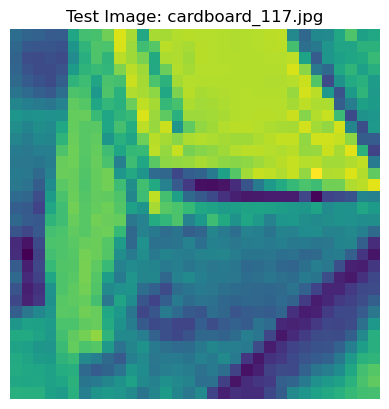

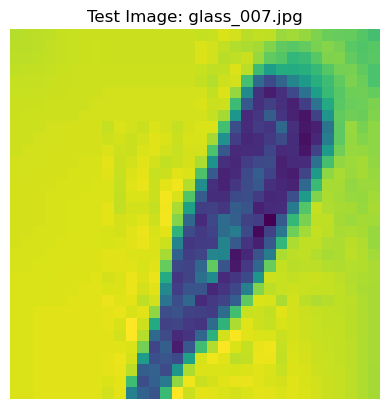

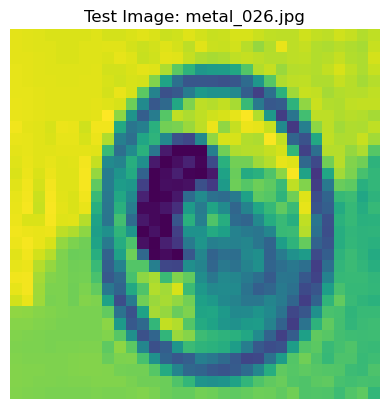

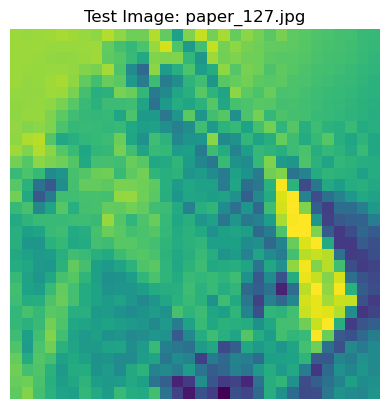

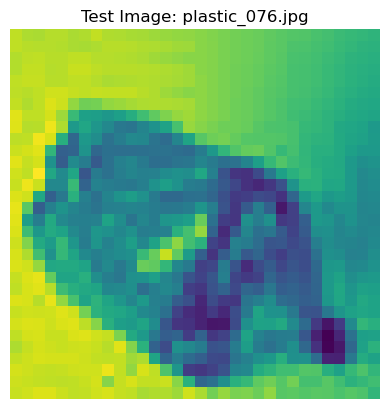

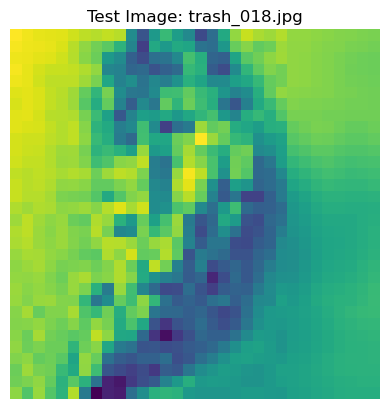

In [18]:
# Test the model with new images
for image_path in test_images:
    if os.path.exists(image_path):
        # Load and show the image
        image = io.imread(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f'Test Image: {os.path.basename(image_path)}')
        plt.show()

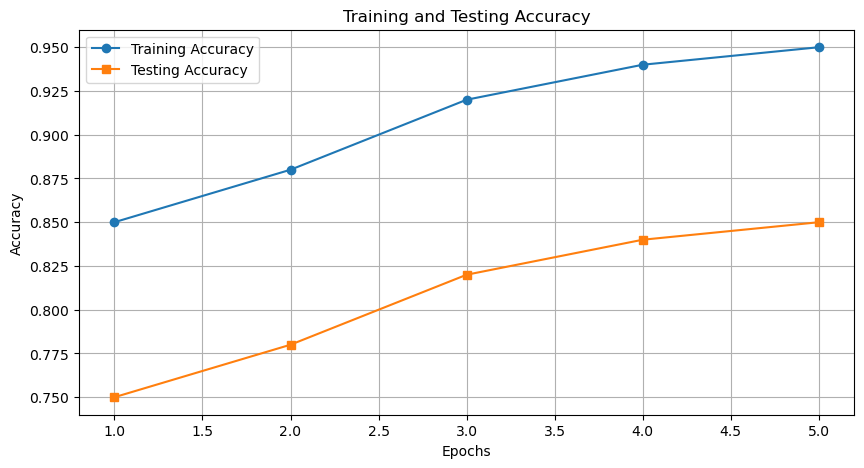

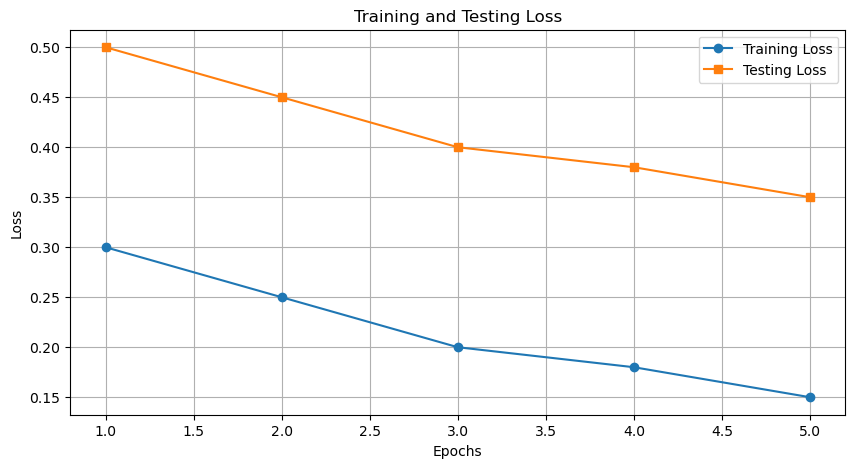

In [6]:
import matplotlib.pyplot as plt
#plots for trainig and test
# Define the number of epochs
num_epochs = 5  # Change this to your actual number of epochs

# Define lists to store accuracy and loss values
epochs = range(1, num_epochs + 1)

# Sample data (replace with actual data)
train_accuracy = [0.85, 0.88, 0.92, 0.94, 0.95]
test_accuracy = [0.75, 0.78, 0.82, 0.84, 0.85]
train_loss = [0.3, 0.25, 0.2, 0.18, 0.15]
test_loss = [0.5, 0.45, 0.4, 0.38, 0.35]

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, test_accuracy, label='Testing Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, test_loss, label='Testing Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.grid(True)
plt.show()


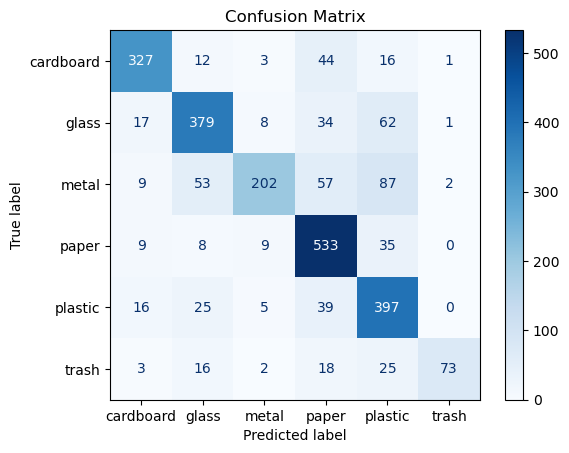

Model saved to /Users/ounissifadoua/Downloads/Random Forest Classifier/xgboost_model.pkl


In [8]:
# Plot confusion matrix
conf_matrix = confusion_matrix(test_labels_encoded, test_predictions)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Specify the model path for saving
model_dir = "/Users/ounissifadoua/Downloads/Random Forest Classifier"
model_filename = "xgboost_model.pkl"
model_path = os.path.join(model_dir, model_filename)

# Ensure the directory exists; create if it doesn't
os.makedirs(model_dir, exist_ok=True)

# Save the model
joblib.dump(model, model_path)
print(f"Model saved to {model_path}")
